# Predicting Success of Kickstarter Projects

## Data Cleaning

### Project Setup

In [125]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.style as msty

In [2]:
ROOT = os.getcwd() + '/'

In [3]:
rawdf = pd.read_csv(ROOT + 'kickstarter_projects.csv')

In [4]:
rawdf.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
rawdf.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
for col_name in rawdf.columns:
    print(col_name, rawdf[col_name].nunique())

ID 378661
name 375764
category 159
main_category 15
currency 14
deadline 3164
goal 8353
launched 378089
pledged 62130
state 6
backers 3963
country 23
usd pledged 95455
usd_pledged_real 106065
usd_goal_real 50339


### EDA

In [8]:
rawdf['main_category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [9]:
temp = rawdf['category'].value_counts()

In [10]:
temp[temp <= 1000][50:]

Literary Journals    278
Textiles             276
Couture              275
Blues                268
Animals              255
Fabrication Tools    250
Makerspaces          238
Printing             238
Movie Theaters       232
Puzzles              231
Bacon                221
Stationery           219
Photo                196
Video Art            194
Romance              190
Knitting             181
Workshops            164
Crochet              162
Translations         153
Pet Fashion          139
Glass                138
Latin                137
Embroidery           113
Typography           108
Pottery              100
Weaving               93
Quilts                81
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, dtype: int64

In [11]:
rawdf['currency'].value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [12]:
rawdf['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [13]:
rawdf['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [14]:
rawdf['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [15]:
rawdf[rawdf['country'] == 'N,0"'].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00


In [16]:
undefdf = rawdf[rawdf['state'] == 'undefined']

In [17]:
undefdf['backers'].nunique()

1

In [18]:
undefdf['country'].nunique()

1

In [19]:
undefdf['usd pledged'].nunique()

0

In [20]:
print(undefdf['deadline'].min())
print(undefdf['deadline'].max())

2012-04-24
2016-06-09


In [21]:
print(rawdf['deadline'].min())
print(rawdf['deadline'].max())

2009-05-03
2018-03-03


In [22]:
drop_locs = list(rawdf[rawdf['state'] == 'undefined'].index)

In [23]:
drop_locs[:10]

[169, 328, 632, 647, 749, 824, 844, 864, 870, 890]

In [24]:
rawdf = rawdf.drop(drop_locs)

In [25]:
rawdf[rawdf['usd pledged'].isnull()].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
2457,1012744036,An Oratorio for our Time - Last Stop Cafe,Music,Music,USD,2016-05-26,5000.0,2016-04-26 19:46:26,5170.00,successful,0,"N,0""",NaN,5170.00,5000.0
4338,1022254171,Help OrphanSporks Record Our Fourth Album!,Music,Music,USD,2016-05-14,2500.0,2016-04-11 07:20:59,1375.00,canceled,0,"N,0""",NaN,1375.00,2500.0
4892,1024989802,Jackson Ruby: The Cassette Album,Music,Music,USD,2016-05-11,5000.0,2016-04-11 19:29:17,5296.00,successful,0,"N,0""",NaN,5296.00,5000.0
5353,1027275369,Help Parker Brown make his first solo album,Music,Music,USD,2016-05-21,3800.0,2016-04-21 16:14:28,5077.00,successful,0,"N,0""",NaN,5077.00,3800.0
5597,1028691308,Help BETHANY record a NEW single in Nash!,Music,Music,USD,2016-05-08,3500.0,2016-04-04 23:32:00,3502.13,successful,0,"N,0""",NaN,3502.13,3500.0


In [26]:
rawdf[rawdf['usd pledged'].isnull()]['backers'].value_counts()

0    235
Name: backers, dtype: int64

In [27]:
rawdf[rawdf['usd pledged'].isnull()]['country'].value_counts()

N,0"    235
Name: country, dtype: int64

In [28]:
rawdf[rawdf['usd pledged'].isnull()]['state'].value_counts()

successful    105
failed        105
canceled       22
suspended       2
live            1
Name: state, dtype: int64

In [ ]:
drop_locs2 = list(rawdf[rawdf['usd pledged'].isnull()].index)

In [37]:
rawdf = rawdf.drop(drop_locs2)

In [277]:
rawdf['state'].value_counts()

failed        197614
successful    133851
canceled       38757
live            2798
suspended       1844
Name: state, dtype: int64

In [ ]:
rawdf['deadline'] = pd.to_datetime(rawdf['deadline'])
rawdf['launched'] = pd.to_datetime(rawdf['launched'])

In [211]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374864 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                374864 non-null  int64         
 1   name              374860 non-null  object        
 2   category          374864 non-null  object        
 3   main_category     374864 non-null  object        
 4   currency          374864 non-null  object        
 5   deadline          374864 non-null  datetime64[ns]
 6   goal              374864 non-null  float64       
 7   launched          374864 non-null  datetime64[ns]
 8   pledged           374864 non-null  float64       
 9   state             374864 non-null  object        
 10  backers           374864 non-null  int64         
 11  country           374864 non-null  object        
 12  usd pledged       374864 non-null  float64       
 13  usd_pledged_real  374864 non-null  float64       
 14  usd_

In [218]:
rawdf['days_active'] = rawdf['deadline'] - rawdf['launched']
rawdf['days_active'] = rawdf['days_active'].dt.days

In [219]:
rawdf.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days_active,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,0.0,1533.95,59,59 days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,100.0,2421.0,30000.00,60,60 days
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,220.0,45000.00,45,45 days
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,1.0,5000.00,30,30 days
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283.0,1283.0,19500.00,56,56 days


In [38]:
for col_name in rawdf.columns:
    print(col_name, rawdf[col_name].nunique())

ID 374864
name 372068
category 159
main_category 15
currency 14
deadline 3164
goal 8312
launched 374302
pledged 61936
state 5
backers 3963
country 22
usd pledged 95455
usd_pledged_real 105383
usd_goal_real 50032


In [39]:
mc_list = rawdf['main_category'].value_counts()
mc_list

Film & Video    62697
Music           49530
Publishing      39379
Games           35226
Technology      32562
Design          30067
Art             28153
Food            24599
Fashion         22812
Theater         10912
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

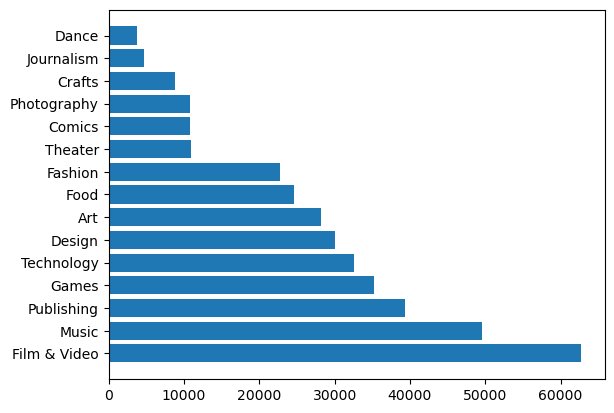

In [40]:
plt.yticks(np.arange(len(mc_list)), list(mc_list.index))
plt.barh(np.arange(len(mc_list)), mc_list)
plt.show()

#### Takeaways:

=> Many of the art based categories seem to be less popular in terms of projects being sponsored
=> All categories have fairly high representation, with Dance being the lowest with 3767
=> Depending on distribution of subcategories, we may just drop the individual categories, and stick with the main categories in order to generalize better

In [41]:
for mc in list(rawdf.main_category.unique()):
    print(mc, "{}".format(("." * (20 - len(mc)))) ,rawdf[rawdf['main_category'] == mc]['category'].nunique())

Publishing .......... 18
Film & Video ........ 20
Music ............... 19
Food ................ 13
Design .............. 7
Crafts .............. 15
Games ............... 8
Comics .............. 6
Fashion ............. 9
Theater ............. 8
Art ................. 13
Photography ......... 7
Technology .......... 16
Dance ............... 5
Journalism .......... 6


In [43]:
cat_perc = pd.DataFrame(columns=['main_category', 'category', '%success', '%fail', '%other','%ofmain', 'count'])

In [44]:
for mc in list(rawdf.main_category.unique()):
    mcdf    = rawdf[rawdf['main_category'] == mc]
    main_cat_count = mcdf.shape[0]
    subcats = list(mcdf['category'].unique())
    
    for cat in subcats:
        cdf       = mcdf[mcdf['category'] == cat]
        cat_count = cdf.shape[0]
        csuc      = cdf[cdf['state'] == 'successful'].shape[0] / cat_count
        cfail     = cdf[cdf['state'] == 'failed'].shape[0] / cat_count
        coth      = 1 - (csuc + cfail)
        cofmain   = cat_count / main_cat_count
        
        cat_perc.loc[len(cat_perc.index)] = [mc, cat, csuc, cfail, coth, cofmain, cat_count]

In [85]:
cat_perc.head()

,main_category,category,%success,%fail,%other,%ofmain,count
0,Publishing,Poetry,0.355734,0.554419,0.089847,0.034765,1369
1,Publishing,Nonfiction,0.268126,0.623302,0.108573,0.211204,8317
2,Publishing,Art Books,0.506726,0.415919,0.077354,0.067955,2676
3,Publishing,Fiction,0.243565,0.640816,0.115620,0.232814,9168
4,Publishing,Publishing,0.296833,0.611765,0.091403,0.140303,5525


In [62]:
sort1 = cat_perc.sort_values(by='count')
sort2 = sort1[sort1['count'] <= 1000]
sort2['count'].sum()

35252

In [87]:
for cat in cat_perc['main_category'].unique():
    temp = cat_perc[cat_perc['main_category'] == cat]
    print(list(temp[temp['count'] == temp['count'].max()]['category']),temp['count'].max() )
    print(list(temp[temp['count'] == temp['count'].max()]['%success']))
    print()

['Fiction'] 9168
[0.24356457242582896]

['Documentary'] 16138
[0.36708390135084895]

['Music'] 13340
[0.4752623688155922]

['Food'] 11492
[0.2868952314653672]

['Product Design'] 22311
[0.3568195060732374]

['Crafts'] 4664
[0.24914236706689538]

['Tabletop Games'] 14178
[0.554803216250529]

['Comics'] 4996
[0.5016012810248198]

['Fashion'] 8554
[0.2557867664250643]

['Theater'] 7056
[0.6242913832199547]

['Art'] 8253
[0.4101538834363262]

['Photography'] 5752
[0.32614742698191934]

['Technology'] 6927
[0.19012559549588567]

['Dance'] 2321
[0.6643688065489013]

['Journalism'] 1747
[0.2701774470520893]



In [46]:
(cat_perc['category'].value_counts() > 1)[:8]

Comedy          True
Spaces          True
Anthologies     True
Web             True
Letterpress     True
Events          True
Experimental    True
Festivals       True
Name: category, dtype: bool

In [47]:
cat_perc[cat_perc['category'] == 'Comedy']

,main_category,category,%success,%fail,%other,%ofmain,count
14,Publishing,Comedy,0.333333,0.546667,0.120000,0.001905,75
25,Film & Video,Comedy,0.385412,0.505412,0.109176,0.033893,2125
55,Music,Comedy,0.368421,0.526316,0.105263,0.000384,19
122,Theater,Comedy,0.603960,0.306931,0.089109,0.009256,101


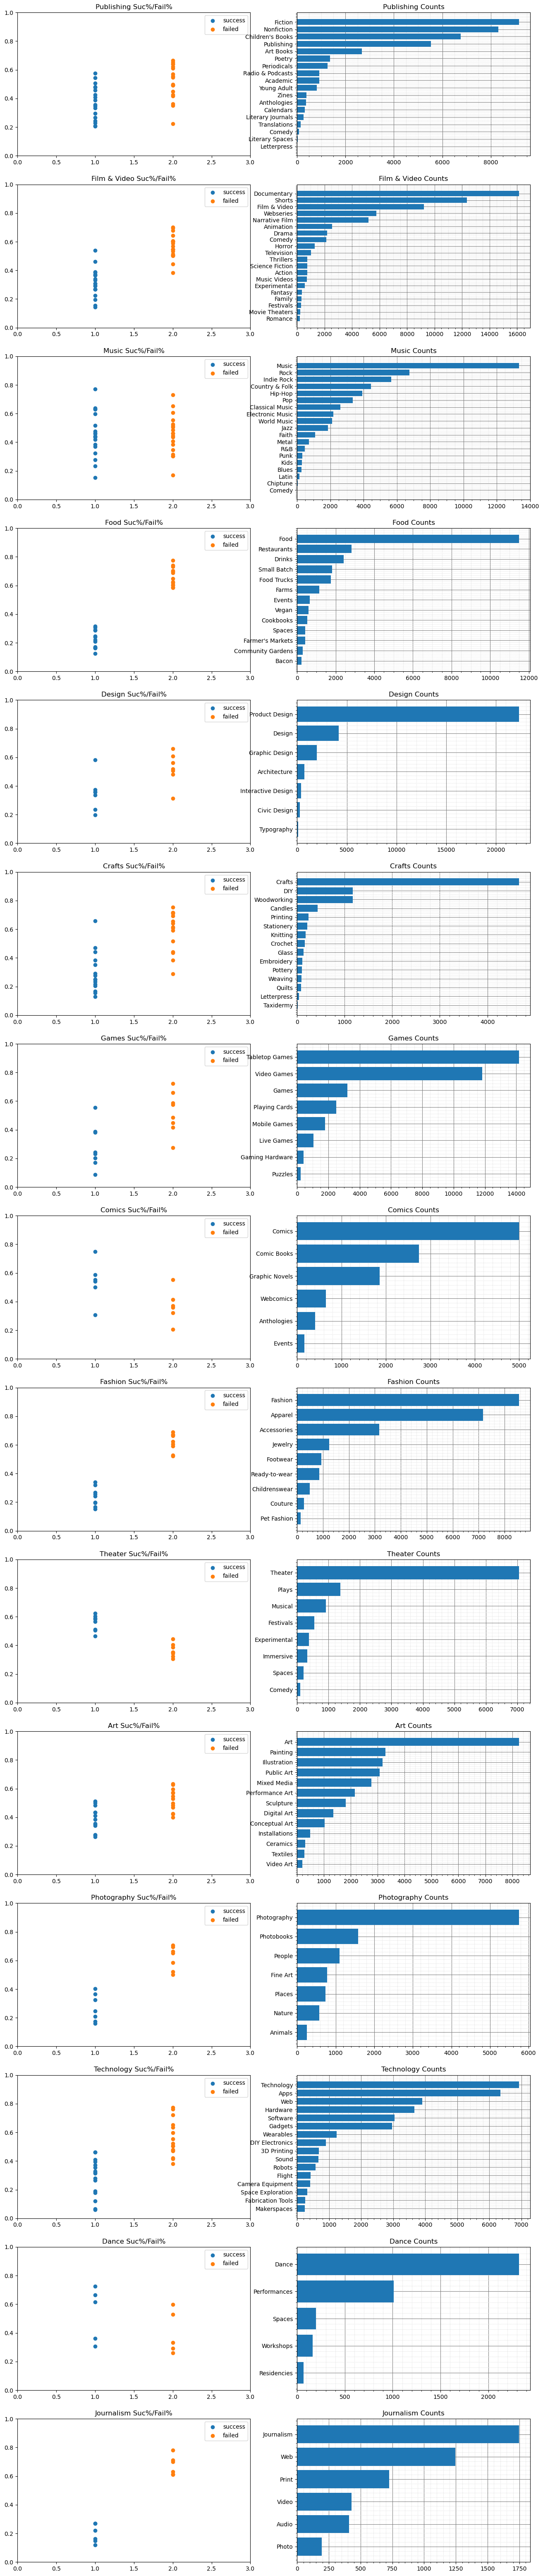

In [142]:
fig, axs = plt.subplots(cat_perc['main_category'].nunique(), 2, figsize=(16,80))
i = 0
for mc in cat_perc.main_category.unique():
    mcdf = cat_perc[cat_perc['main_category'] == mc]
    mcdf = mcdf.sort_values('count')
    
    suc  = list(mcdf['%success'])
    fail = list(mcdf['%fail'])

    axs[i,0].set_title(mc + ' Suc%/Fail%')
    axs[i,0].set_xlim(0,3)
    axs[i,0].set_ylim(0,1)
    axs[i,0].scatter([1] * len(suc), suc)
    axs[i,0].scatter([2] * len(fail), fail)
    axs[i,0].legend(['success','failed'])
    
    axs[i,1].set_title(mc + ' Counts')
    axs[i,1].grid(which='major', color='gray', linestyle='-')
    axs[i,1].grid(which='minor', color='lightgray', linestyle='dotted', alpha=0.9)
    axs[i,1].minorticks_on()
    axs[i,1].set_axisbelow(True)
    axs[i,1].barh(np.arange(mcdf.shape[0]), list(mcdf['count']))
    axs[i,1].set_yticks(np.arange(mcdf.shape[0]), list(mcdf['category']))
    
    i+=1
    
plt.show()

In [143]:
cat_perc[cat_perc['main_category'] == 'Crafts'].sort_values('count')

,main_category,category,%success,%fail,%other,%ofmain,count
91,Crafts,Taxidermy,0.384615,0.384615,0.230769,0.001476,13
84,Crafts,Letterpress,0.657895,0.289474,0.052632,0.004314,38
88,Crafts,Quilts,0.234568,0.691358,0.074074,0.009195,81
79,Crafts,Weaving,0.290323,0.591398,0.118280,0.010557,93
87,Crafts,Pottery,0.440000,0.440000,0.120000,0.011352,100
82,Crafts,Embroidery,0.168142,0.716814,0.115044,0.012828,113
89,Crafts,Glass,0.275362,0.608696,0.115942,0.015666,138
86,Crafts,Crochet,0.216049,0.716049,0.067901,0.018390,162
81,Crafts,Knitting,0.469613,0.436464,0.093923,0.020547,181
80,Crafts,Stationery,0.351598,0.515982,0.132420,0.024861,219


#### Takeaways

=> The largest represented group in many of these subcategories may be a repeat of the main category without further specification
=> Many categoriies have very low representation. Will likely combine them into an "Other" category to make the model more "Robust"
=> For some categories such as food, we see fairly tight clusters and trend, which means we can combine it into a single category, and don't need a subcategory.
=> The following processing for each main category will be performed:
   => Journalism 
      - Categories will be combined into one class of journalism since all perform similarly
   => Publishing
      - Categories with sample sizes smaller than 1000 samples will be combined into "Pub_Other"
   => Film & Video
      - Shorts is the only one that has a success% above 50%, and it has a large sample size
      - Other categories will be com

##### Currency and Country

In [156]:
rawdf['currency'].value_counts()

USD    292627
GBP     33672
EUR     17219
CAD     14756
AUD      7839
SEK      1757
MXN      1752
NZD      1447
DKK      1113
CHF       761
NOK       708
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [157]:
rawdf['country'].value_counts()

US    292627
GB     33672
CA     14756
AU      7839
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1757
MX      1752
NZ      1447
DK      1113
IE       811
CH       761
NO       708
HK       618
BE       617
AT       597
SG       555
LU        62
JP        40
Name: country, dtype: int64

#### Takeaway
=> Countries and currencies are mostly the same for the major regions
=> Euro currency is broken down into individual countries, but we will drop this column
   since there is strong redundency in relation to currency; There may be underlying 
   trends based on culture and interest in certain areas in each individual country,
   but there is not enough data to support the decision.

<BarContainer object of 14 artists>

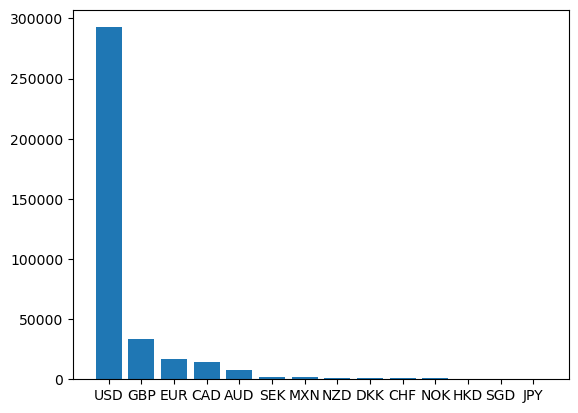

In [164]:
val = list(rawdf['currency'].value_counts())
lab = list(rawdf['currency'].value_counts().index)
plt.bar(lab, val)

In [220]:
curr_list = lab[:5]
curr_dict = {} 
for c in curr_list:
    curr_dict['{}_df'.format(c)] = rawdf[rawdf['currency'] == c][['backers', 
                                                                  'usd_pledged_real',
                                                                  'usd_goal_real',
                                                                  'days_active']]

In [221]:
for key in curr_dict.keys():
    print(key[:3])
    print(curr_dict['{}'.format(key)].describe(datetime_is_numeric=True))
    print()

USD
             backers  usd_pledged_real  usd_goal_real    days_active
count  292627.000000      2.926270e+05   2.926270e+05  292627.000000
mean      113.078615      9.670193e+03   4.403497e+04      34.740930
std       985.723400      9.932942e+04   1.108372e+06      68.025057
min         0.000000      0.000000e+00   1.000000e-02       1.000000
25%         2.000000      4.100000e+01   2.000000e+03      30.000000
50%        14.000000      7.250000e+02   5.250000e+03      30.000000
75%        60.000000      4.370000e+03   1.500000e+04      38.000000
max    219382.000000      2.033899e+07   1.000000e+08   14867.000000

GBP
            backers  usd_pledged_real  usd_goal_real   days_active
count  33672.000000      3.367200e+04   3.367200e+04  33672.000000
mean      84.924774      7.026234e+03   4.277412e+04     32.064445
std      618.775076      5.607382e+04   1.337008e+06     11.177988
min        0.000000      0.000000e+00   1.220000e+00      1.000000
25%        2.000000      2.904000e+

#### Takeaway
=> There is a project that has lasted 14,867 days in the US. => 40 years which is obviously incorrect / unfeasable
   This point will need to be reviewed.

(array([4.73000e+02, 1.03400e+03, 2.98900e+03, 3.96500e+03, 4.96800e+03,
        8.45500e+03, 9.70600e+03, 1.15450e+04, 8.60800e+03, 1.08950e+04,
        1.86641e+05, 1.65240e+04, 1.34200e+04, 6.65200e+03, 1.37380e+04,
        2.06050e+04, 3.26100e+03, 4.47700e+03, 2.26000e+03, 2.30800e+03,
        1.70000e+03, 3.59250e+04, 4.61000e+02, 3.11000e+02, 1.33000e+02,
        2.79000e+02, 1.97000e+02, 1.94000e+02, 1.08000e+02, 1.63000e+02,
        1.90000e+02, 6.10000e+02, 2.06200e+03]),
 array([ 1.        ,  3.75757576,  6.51515152,  9.27272727, 12.03030303,
        14.78787879, 17.54545455, 20.3030303 , 23.06060606, 25.81818182,
        28.57575758, 31.33333333, 34.09090909, 36.84848485, 39.60606061,
        42.36363636, 45.12121212, 47.87878788, 50.63636364, 53.39393939,
        56.15151515, 58.90909091, 61.66666667, 64.42424242, 67.18181818,
        69.93939394, 72.6969697 , 75.45454545, 78.21212121, 80.96969697,
        83.72727273, 86.48484848, 89.24242424, 92.        ]),
 <BarContaine

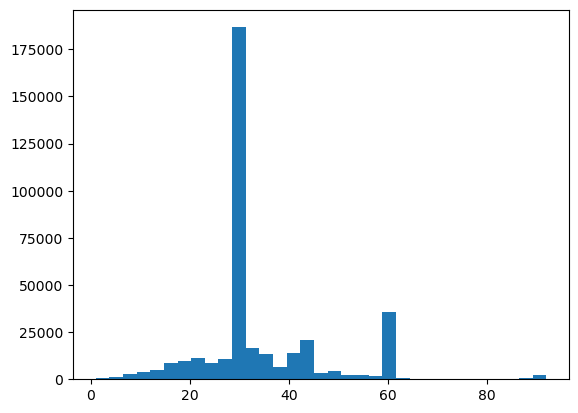

In [241]:
plt.hist(rawdf[rawdf['days_active'] <= 100]['days_active'], bins=33)

(array([4., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([14709. , 14810.5, 14912. , 15013.5, 15115. , 15216.5, 15318. ,
        15419.5, 15521. , 15622.5, 15724. , 15825.5, 15927. , 16028.5,
        16130. , 16231.5, 16333. , 16434.5, 16536. , 16637.5, 16739. ]),
 <BarContainer object of 20 artists>)

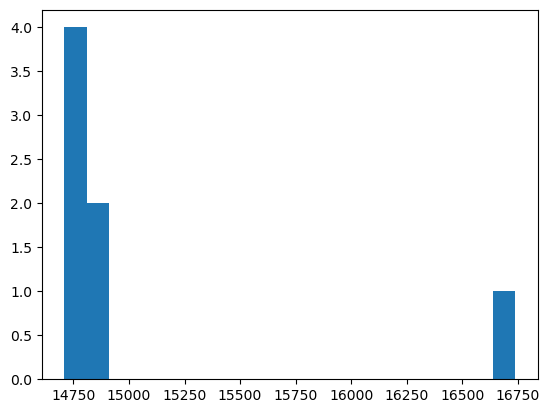

In [258]:
plt.hist(rawdf[rawdf['days_active'] >= 100]['days_active'], bins=20)

In [260]:
for i in range(90, 105):
    print(i, rawdf[rawdf['days_active'] >= i].shape[0])

90 2069
91 496
92 29
93 7
94 7
95 7
96 7
97 7
98 7
99 7
100 7
101 7
102 7
103 7
104 7


In [263]:
successda_df = rawdf[(rawdf['days_active'] <= 100) & (rawdf['state'] == 'successful')]
failda_df    = rawdf[(rawdf['days_active'] <= 100) & (rawdf['state'] == 'failed')]

(0.0, 120000.0)

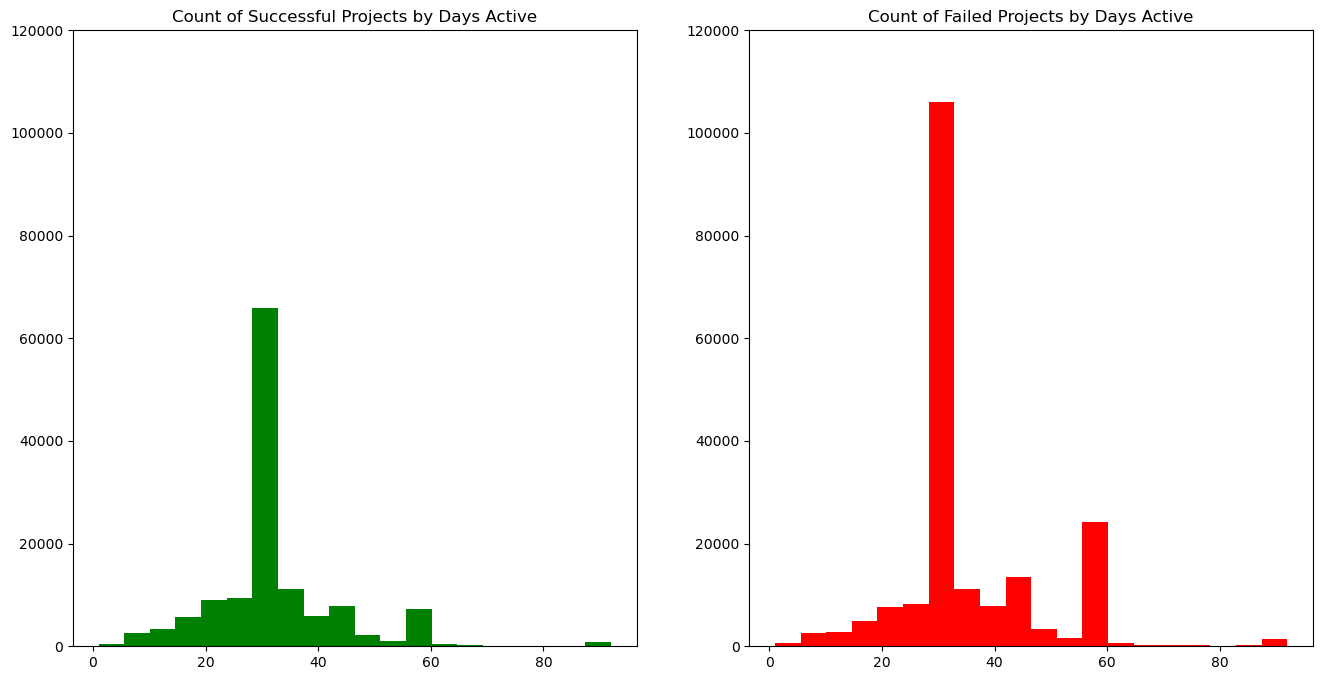

In [275]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].hist(successda_df['days_active'].to_list(), bins=20 ,color='g')
axs[0].set_ylim(0,120000)
axs[0].set_title('Count of Successful Projects by Days Active')
axs[1].hist(failda_df['days_active'].to_list(), bins=20, color='r')
axs[1].set_title('Count of Failed Projects by Days Active')
axs[1].set_ylim(0,120000)

#### Takeaway:
=> There appears to be outliers that occur above the 90 day mark. It seems like these values are of course mistakes in
   the dataset and will be removed; This could be a kickstarter internal limit, where they do not host projects for 
   more than ~90 days. 


In [190]:
rawdf.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [188]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374864 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374864 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374864 non-null  object 
 3   main_category     374864 non-null  object 
 4   currency          374864 non-null  object 
 5   deadline          374864 non-null  object 
 6   goal              374864 non-null  float64
 7   launched          374864 non-null  object 
 8   pledged           374864 non-null  float64
 9   state             374864 non-null  object 
 10  backers           374864 non-null  int64  
 11  country           374864 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  374864 non-null  float64
 14  usd_goal_real     374864 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 53.8+ MB


In [ ]:
rawdf['']

In [196]:
rawdf.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Takeaways:


## Processing Data

In [49]:
wdf = rawdf.copy()

In [50]:
drop_locs1 = list(wdf[wdf['state'] == 'undefined'].index)

In [51]:
wdf = wdf.drop(drop_locs1, axis=0)

In [52]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374864 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374864 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374864 non-null  object 
 3   main_category     374864 non-null  object 
 4   currency          374864 non-null  object 
 5   deadline          374864 non-null  object 
 6   goal              374864 non-null  float64
 7   launched          374864 non-null  object 
 8   pledged           374864 non-null  float64
 9   state             374864 non-null  object 
 10  backers           374864 non-null  int64  
 11  country           374864 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  374864 non-null  float64
 14  usd_goal_real     374864 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [53]:
drop_locs2 = list(wdf[wdf['usd pledged'].isnull()].index)

In [54]:
wdf = wdf.drop(drop_locs2)

In [146]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374864 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374864 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374864 non-null  object 
 3   main_category     374864 non-null  object 
 4   currency          374864 non-null  object 
 5   deadline          374864 non-null  object 
 6   goal              374864 non-null  float64
 7   launched          374864 non-null  object 
 8   pledged           374864 non-null  float64
 9   state             374864 non-null  object 
 10  backers           374864 non-null  int64  
 11  country           374864 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  374864 non-null  float64
 14  usd_goal_real     374864 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB
